### Implementing the Machine Learning Model

In [1]:
import pandas as pd 
import numpy as np 

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt 
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/clean_data_AirQualityUCI.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

,C6H6(GT),NO2/NOx(GT),Dew_Point
Datetime,,,
2004-03-10 18:00:00,11.9,0.680723,3.38
2004-03-10 19:00:00,9.4,0.893204,2.84
2004-03-10 20:00:00,9.0,0.870229,2.70
2004-03-10 21:00:00,9.2,0.709302,3.00
2004-03-10 22:00:00,6.5,0.885496,3.12


In [4]:
overall_duration = df.index.max() - df.index.min()
split_date = df.index.min() + 0.8 * overall_duration

print(f"Overall duration: {overall_duration}")
print(f"80% point: {split_date}")

Overall duration: 389 days 20:00:00


NameError: name 'split_point' is not defined

In [ ]:
benz = pd.DataFrame(df['C6H6(GT)'])

train = benz.loc[benz.index < split_date]
test = benz.loc[benz.index >= split_date]

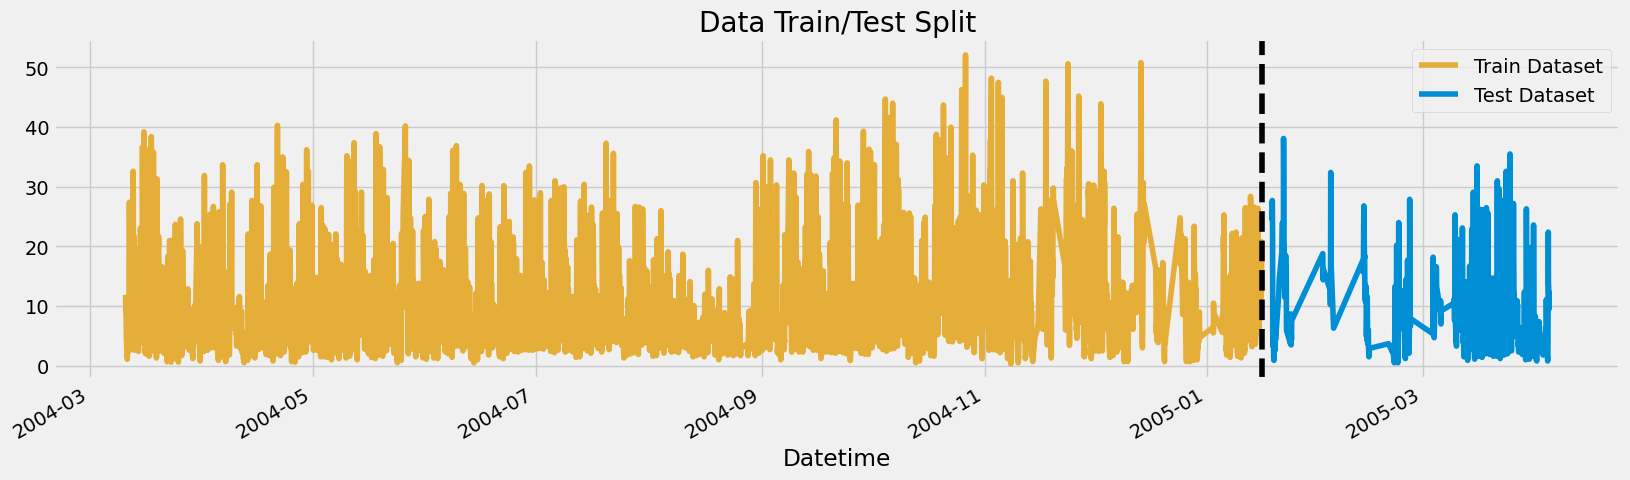

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))

train.plot(ax = ax,color=color_pal[2])
test.plot(ax = ax,color=color_pal[0])
ax.axvline('2005-01-16',color='black',ls='--')

# Customization
ax.legend(['Train Dataset','Test Dataset'],labelcolor='black')
ax.tick_params(colors='black')
ax.xaxis.label.set_color('black')
plt.title('Data Train/Test Split',color='black')

ax.legend
plt.show()

Text(0.5, 0, 'Datetime')

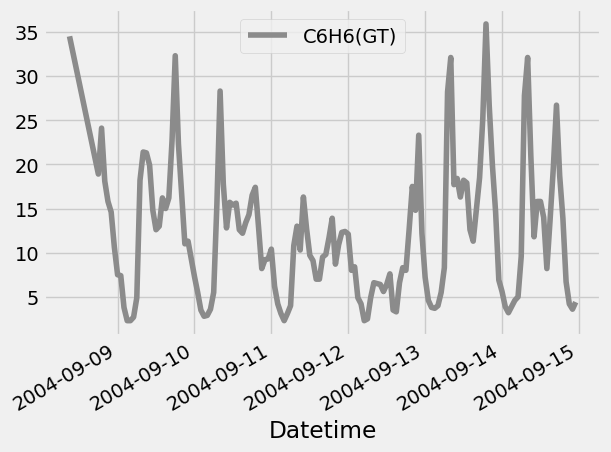

In [ ]:
benz.loc[(benz.index > '2004-09-08') & (benz.index < '2004-09-15')].plot(color= color_pal[4])
plt.legend(['C6H6(GT)'],labelcolor='black',loc='best')
plt.tick_params(colors='black')
plt.xlabel('Datetime',color='black')

In [ ]:
def time_features(df):
    ''' Create a times series feature based on a time-series index'''
    feat_df = df.copy()
    feat_df['hour'] = feat_df.index.hour
    feat_df['dayofweek'] = feat_df.index.dayofweek
    feat_df['quarter'] = feat_df.index.quarter
    feat_df['month'] = feat_df.index.month
    return feat_df

benz_time = time_features(benz)

In [ ]:
benz_time.head()

,C6H6(GT),hour,dayofweek,quarter,month
Datetime,,,,,
2004-03-10 18:00:00,11.9,18,2,1,3
2004-03-10 19:00:00,9.4,19,2,1,3
2004-03-10 20:00:00,9.0,20,2,1,3
2004-03-10 21:00:00,9.2,21,2,1,3
2004-03-10 22:00:00,6.5,22,2,1,3


### Visualizing Feature/Target Relationships

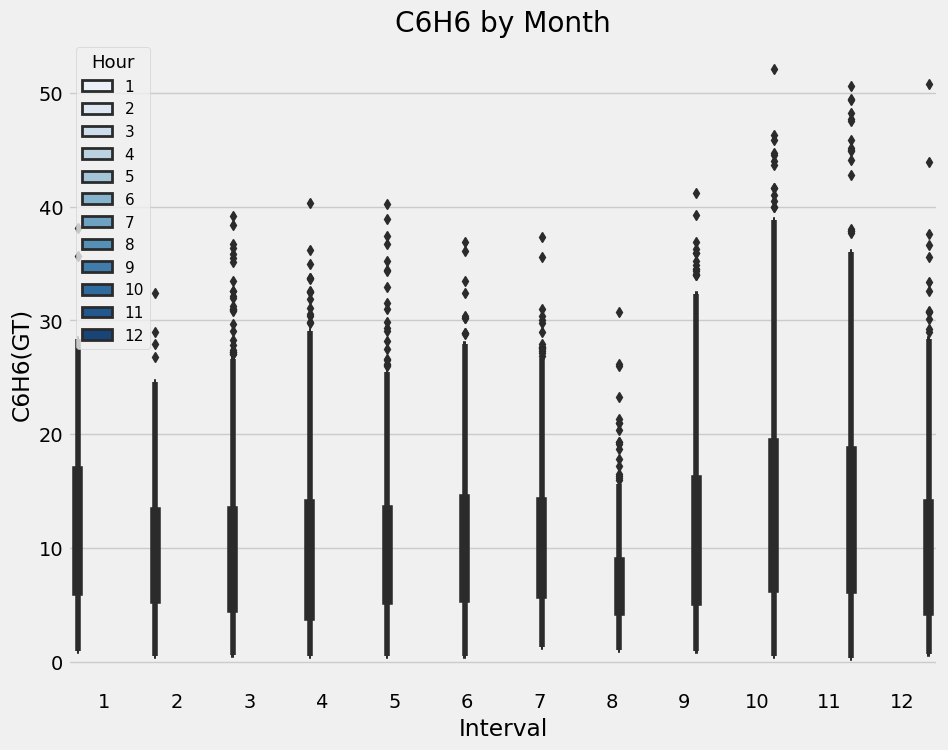

In [ ]:
#By Hour 

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=benz_time,x='month',y='C6H6(GT)',hue='month',palette="Blues")
ax.set_title('C6H6 by Month', color='black')
ax.set_xlabel('Interval', color='black')
ax.set_ylabel('C6H6(GT)', color='black')
ax.tick_params(axis='x',colors='black')
ax.tick_params(axis='y',colors='black')
legend = ax.legend(title='Hour', title_fontsize='13', fontsize='11', loc='upper left', frameon=True)
legend.get_title().set_color('black')
for text in legend.get_texts():
    text.set_color('black')
plt.show()

## Predictions

In [ ]:
train = time_features(train)
test = time_features(test)

train.columns

Index(['C6H6(GT)', 'hour', 'dayofweek', 'quarter', 'month'], dtype='object')

In [ ]:
features = ['hour','dayofweek','quarter','month']
target = 'C6H6(GT)'
test.head()


,C6H6(GT),hour,dayofweek,quarter,month
Datetime,,,,,
2005-01-18 15:00:00,26.1,15,1,1,1
2005-01-18 16:00:00,24.7,16,1,1,1
2005-01-18 17:00:00,24.5,17,1,1,1
2005-01-18 18:00:00,27.7,18,1,1,1
2005-01-18 19:00:00,26.0,19,1,1,1


In [ ]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [ ]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds=50,
learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],
verbose=True)

[0]	validation_0-rmse:12.68134	validation_1-rmse:11.15875
[1]	validation_0-rmse:12.57446	validation_1-rmse:11.06157
[2]	validation_0-rmse:12.46880	validation_1-rmse:10.96523
[3]	validation_0-rmse:12.36436	validation_1-rmse:10.87043
[4]	validation_0-rmse:12.26109	validation_1-rmse:10.77634
[5]	validation_0-rmse:12.15905	validation_1-rmse:10.68364
[6]	validation_0-rmse:12.05815	validation_1-rmse:10.59187
[7]	validation_0-rmse:11.95844	validation_1-rmse:10.50021
[8]	validation_0-rmse:11.85990	validation_1-rmse:10.41183
[9]	validation_0-rmse:11.76249	validation_1-rmse:10.32249
[10]	validation_0-rmse:11.66624	validation_1-rmse:10.23644
[11]	validation_0-rmse:11.57109	validation_1-rmse:10.14932


[12]	validation_0-rmse:11.47706	validation_1-rmse:10.06544
[13]	validation_0-rmse:11.38414	validation_1-rmse:9.98046
[14]	validation_0-rmse:11.29232	validation_1-rmse:9.89779
[15]	validation_0-rmse:11.20156	validation_1-rmse:9.81589
[16]	validation_0-rmse:11.11192	validation_1-rmse:9.73517
[17]	validation_0-rmse:11.02329	validation_1-rmse:9.65532
[18]	validation_0-rmse:10.93575	validation_1-rmse:9.57560
[19]	validation_0-rmse:10.84922	validation_1-rmse:9.49779
[20]	validation_0-rmse:10.76375	validation_1-rmse:9.42154
[21]	validation_0-rmse:10.67929	validation_1-rmse:9.34535
[22]	validation_0-rmse:10.59584	validation_1-rmse:9.27089
[23]	validation_0-rmse:10.51337	validation_1-rmse:9.19637
[24]	validation_0-rmse:10.43189	validation_1-rmse:9.12405
[25]	validation_0-rmse:10.35139	validation_1-rmse:9.05195
[26]	validation_0-rmse:10.27187	validation_1-rmse:8.97971
[27]	validation_0-rmse:10.19331	validation_1-rmse:8.91034
[28]	validation_0-rmse:10.11571	validation_1-rmse:8.84133
[29]	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
index=reg.feature_names_in_,columns=['Importance'])

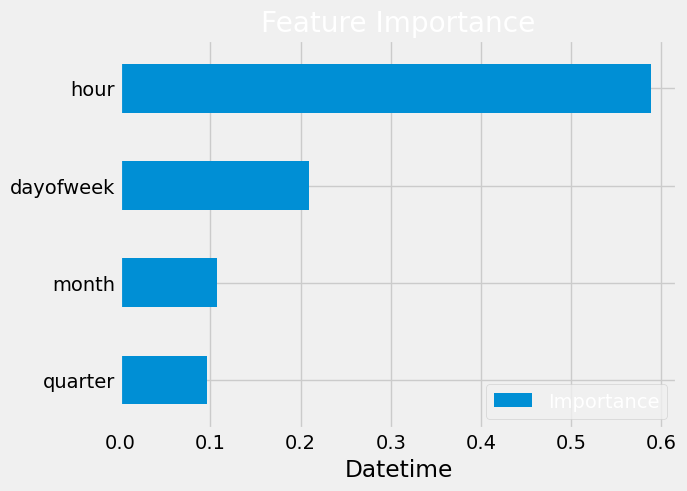

In [ ]:
fi.sort_values('Importance').plot(kind='barh',title='Feature Importance')
plt.tick_params(colors='black')
plt.xlabel('Datetime',color='black')
plt.show()

In [ ]:
test['prediction'] = reg.predict(X_test)
benz = benz.merge(test[['prediction']], how='left',left_index=True,right_index=True)
benz.head()

,C6H6(GT),prediction
Datetime,,
2004-03-10 18:00:00,11.9,NaN
2004-03-10 19:00:00,9.4,NaN
2004-03-10 20:00:00,9.0,NaN
2004-03-10 21:00:00,9.2,NaN
2004-03-10 22:00:00,6.5,NaN


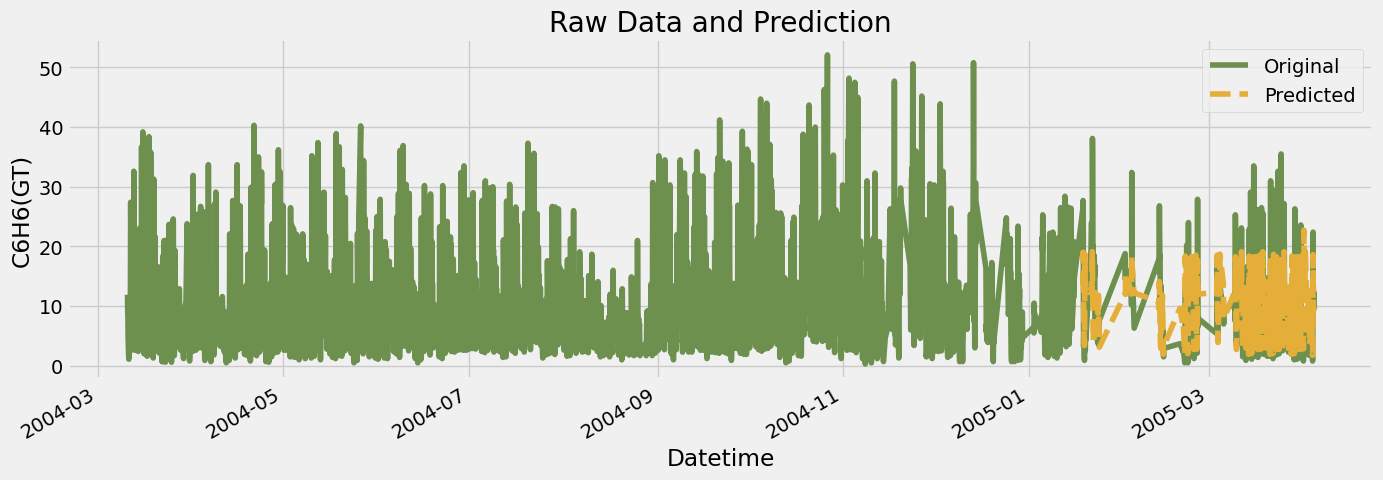

In [ ]:
ax = benz[['C6H6(GT)']].plot(figsize=(15,5),color=color_pal[3])
benz['prediction'].plot(ax=ax,style='--',color=color_pal[2])
ax.legend(['Original','Predicted'],labelcolor='black')
ax.set_title('Raw Data and Prediction',color='black')
ax.tick_params(axis='x',colors='black')
ax.tick_params(axis='y',colors='black')
ax.set_xlabel('Datetime', color='black')
ax.set_ylabel('C6H6(GT)', color='black')
plt.show()

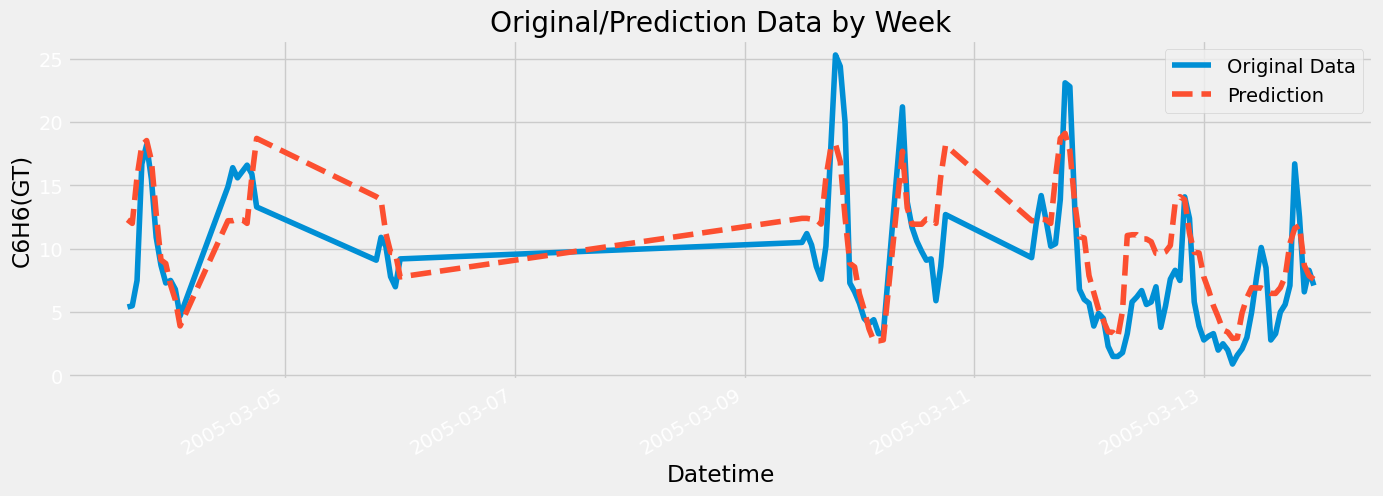

In [ ]:
benz.loc[(df.index >'2005-03-01') & (benz.index < '2005-03-14')]['C6H6(GT)'] \
    .plot(figsize=(15,5),title='Week of Data')
benz.loc[(df.index >'2005-03-01') & (benz.index < '2005-03-14')]['prediction'] \
    .plot(style='--')
plt.xlabel('Datetime',color='black')
plt.ylabel('C6H6(GT)',color='black')
plt.tick_params(axis=xaxis,color='black')
plt.title('Original/Prediction Data by Week',color='black')
plt.legend(['Original Data','Prediction'],labelcolor='black')


In [ ]:
score = np.sqrt(mean_squared_error(test['PJME_MW'],test['prediction']))
print(f' RMSE Score on Test set: {score: 0.2f}')